# Exercice TensorFlow – Prédire le prix de vente d'une voiture
Nous allons entraîner un modèle de régression avec TensorFlow pour prédire le prix de vente (selling_price) d’une voiture à partir des autres caractéristiques.

In [1]:
pip install tensorflow scikit-learn pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

# Chargement du dataset
df = pd.read_csv('dataset.csv')

# Aperçu des premières lignes
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
# Dimensions et types de données
df.info()

# Statistiques descriptives
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,4340,4340.000000,4.340000e+03,4340.000000,4340,4340,4340,4340
unique,1491,NaN,NaN,NaN,5,3,2,5
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner
freq,69,NaN,NaN,NaN,2153,3244,3892,2832
mean,NaN,2013.090783,5.041273e+05,66215.777419,NaN,NaN,NaN,NaN
std,NaN,4.215344,5.785487e+05,46644.102194,NaN,NaN,NaN,NaN
min,NaN,1992.000000,2.000000e+04,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2011.000000,2.087498e+05,35000.000000,NaN,NaN,NaN,NaN
50%,NaN,2014.000000,3.500000e+05,60000.000000,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,6.000000e+05,90000.000000,NaN,NaN,NaN,NaN


## Prétraitement des données

In [4]:
# Suppression de la colonne 'name' (non exploitable directement)
df = df.drop(columns=['name'])

# Encodage des variables catégorielles avec pd.get_dummies
df = pd.get_dummies(df, drop_first=True)

# Séparation des variables X et y
X = df.drop('selling_price', axis=1)
y = df['selling_price']

# Normalisation des variables numériques
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((3472, 13), (868, 13))

## Création du modèle avec TensorFlow

In [7]:
import tensorflow as tf
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense

# Construction du modèle séquentiel
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compilation du modèle
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Résumé du modèle
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,113 (39.50 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

## Valeur de perte (Callback)

In [8]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


In [9]:
# Entraînement
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],  # si utilisé
    verbose=1
)

Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 566048194560.0000 - mae: 503257.8438 - val_loss: 668926017536.0000 - val_mae: 513237.1875
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 604406808576.0000 - mae: 509640.1875 - val_loss: 668595978240.0000 - val_mae: 513032.2500
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 558280933376.0000 - mae: 497334.5312 - val_loss: 667497332736.0000 - val_mae: 512407.7188
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 624513122304.0000 - mae: 514237.3125 - val_loss: 665116409856.0000 - val_mae: 511102.4375
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 556067323904.0000 - mae: 494142.4688 - val_loss: 660923678720.0000 - val_mae: 508838.4062
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 606233755648.0000 - mae: 513456.9375 - val_loss: 654428471296.0000 - val_mae: 505353.1250
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 582202818560.0000 - mae: 509449.0312 - val_loss

## Évaluation du modèle

In [10]:
# Évaluation sur les données de test
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'MAE (erreur absolue moyenne) : {test_mae:.2f}')

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 147826147328.0000 - mae: 248370.3750
MAE (erreur absolue moyenne) : 251972.55


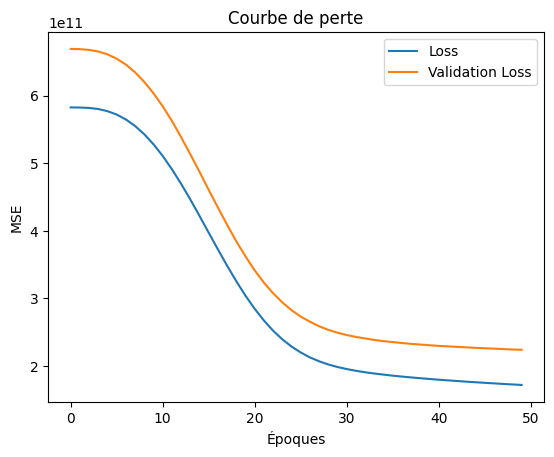

In [11]:
import matplotlib.pyplot as plt

# Visualisation des courbes d’apprentissage
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Courbe de perte')
plt.xlabel('Époques')
plt.ylabel('MSE')
plt.legend()
plt.show()